In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [5]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [6]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [7]:
# data visualisation

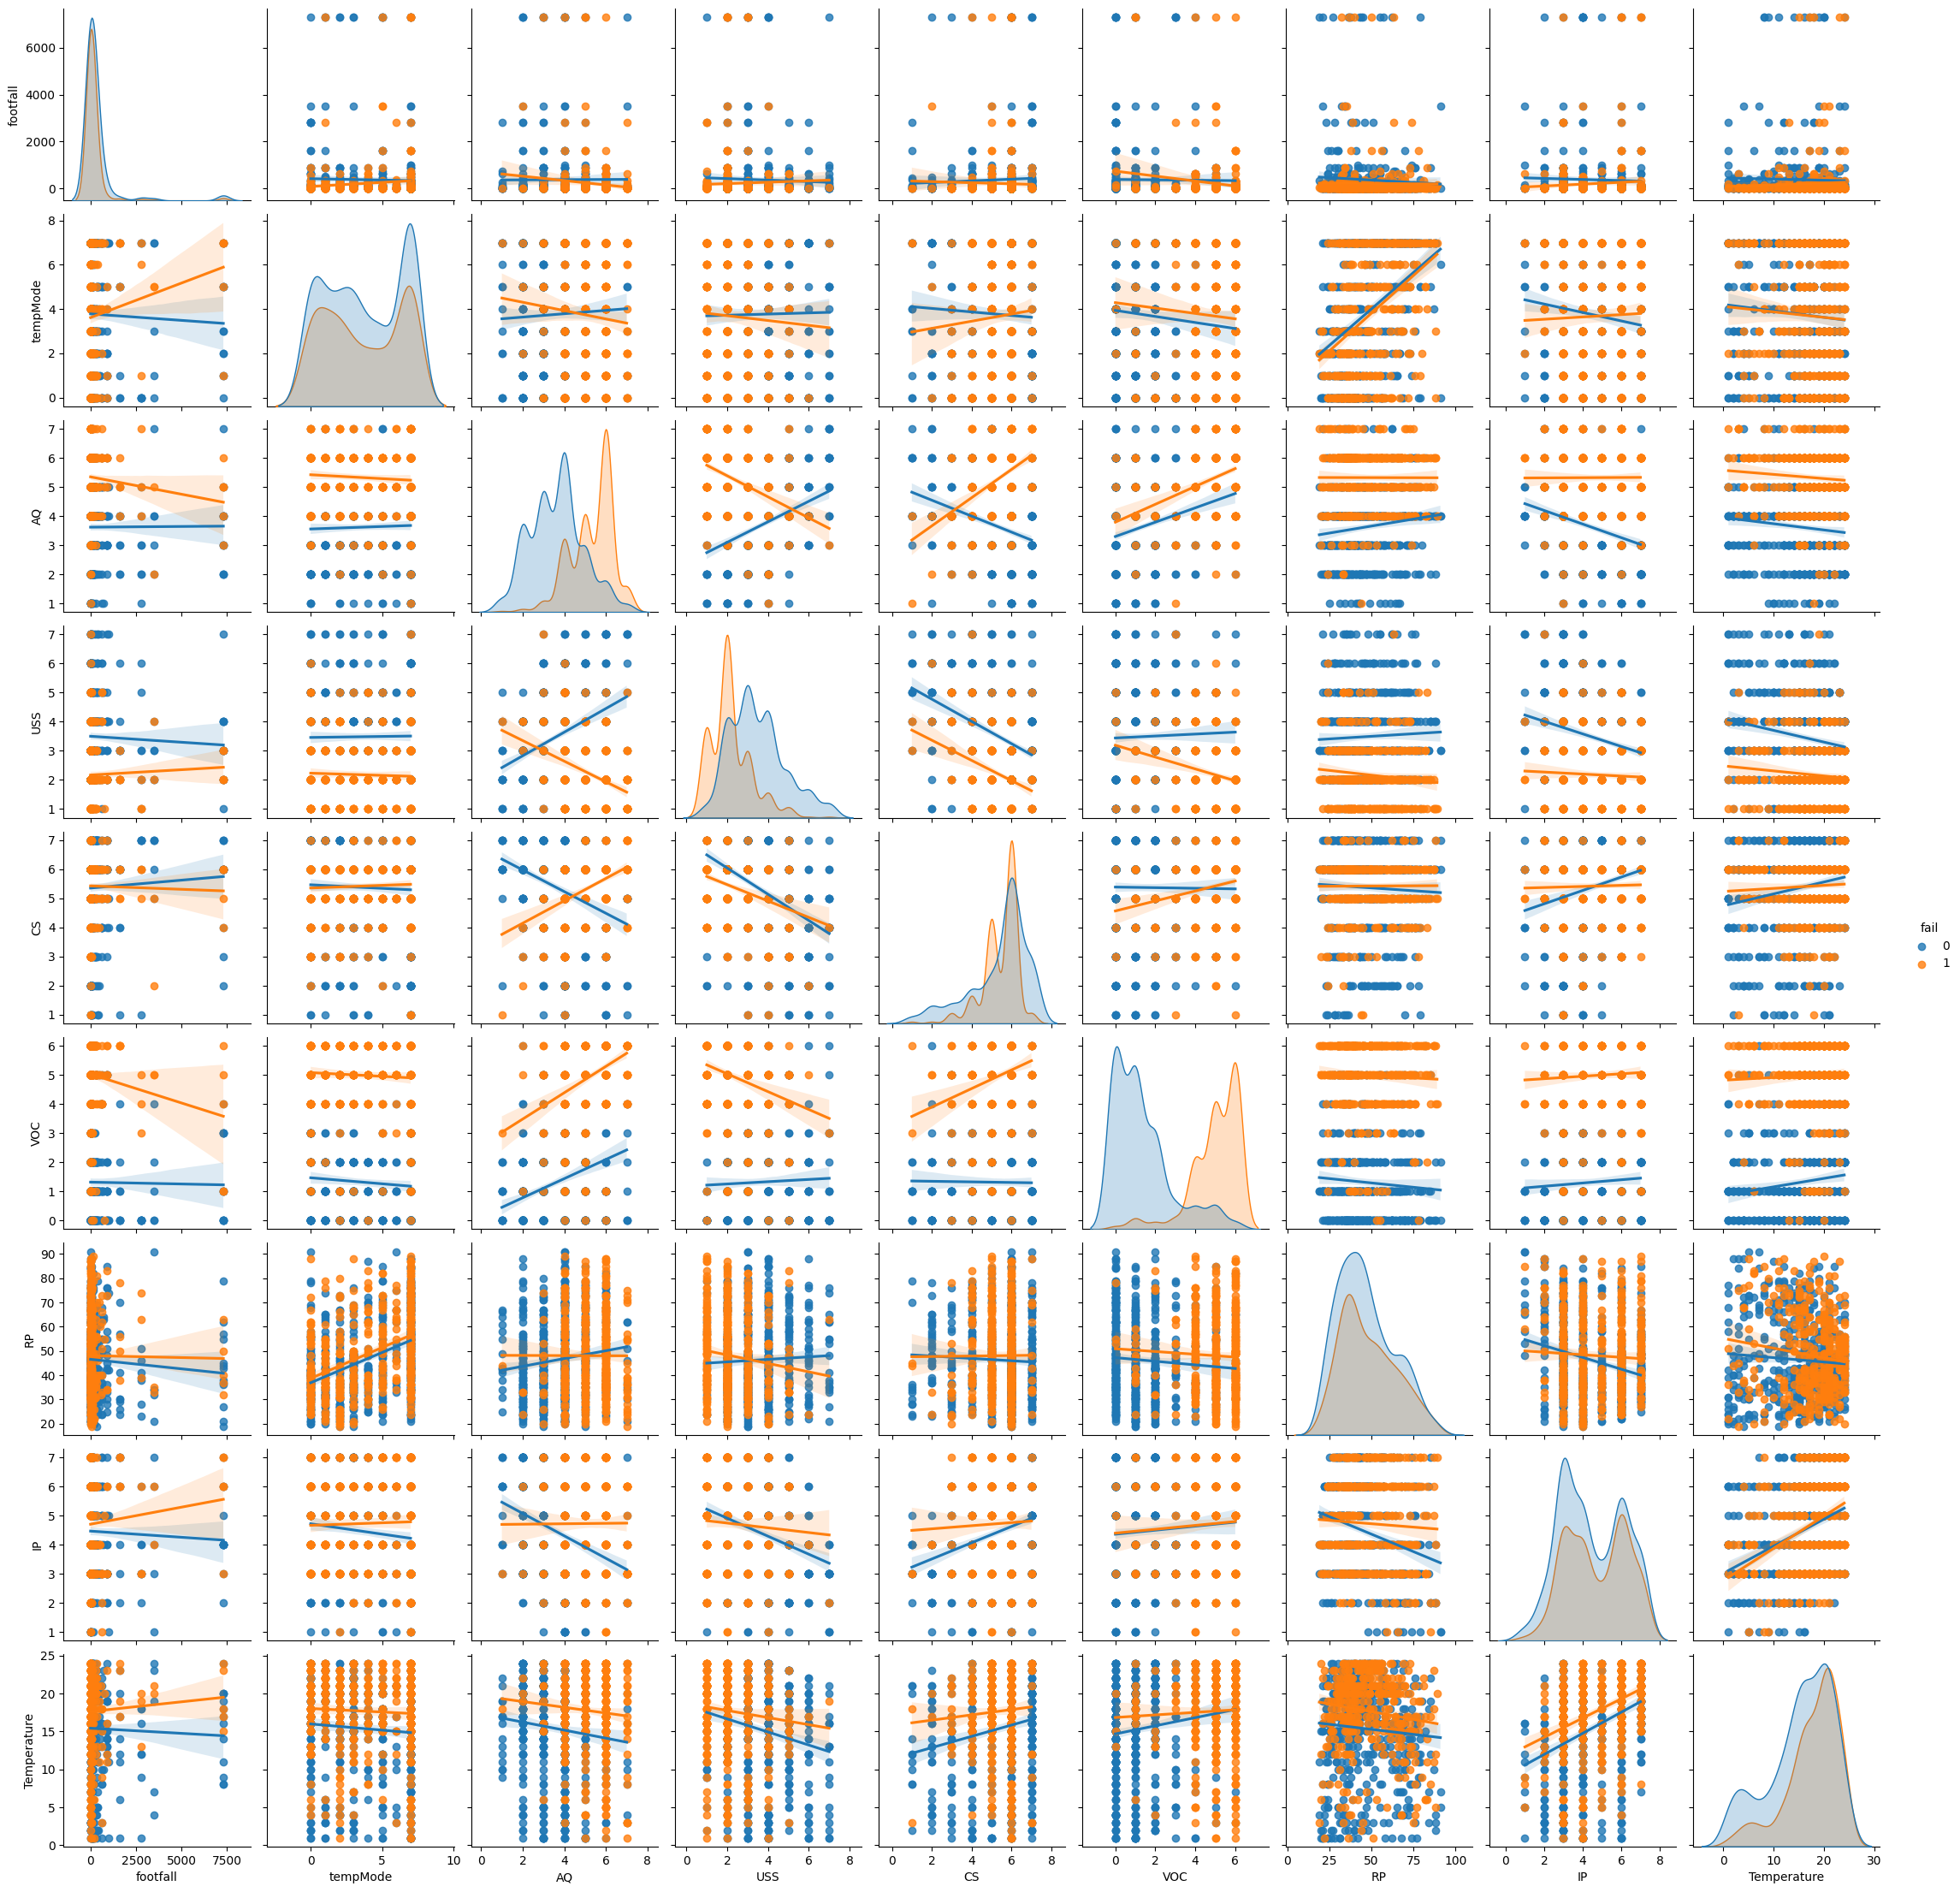

In [8]:
sns.pairplot(df,hue="fail",kind="reg")

[Text(0, 0, '551'), Text(0, 0, '393')]

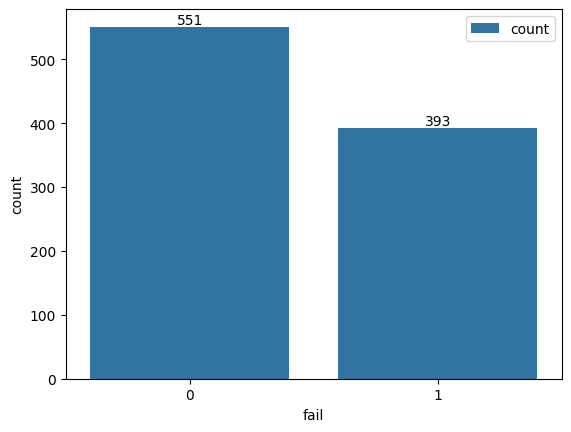

In [11]:
ax = sns.countplot(x = df["fail"],data=df, label = "count")
ax.bar_label(ax.containers[0], label_type='edge')

<Axes: >

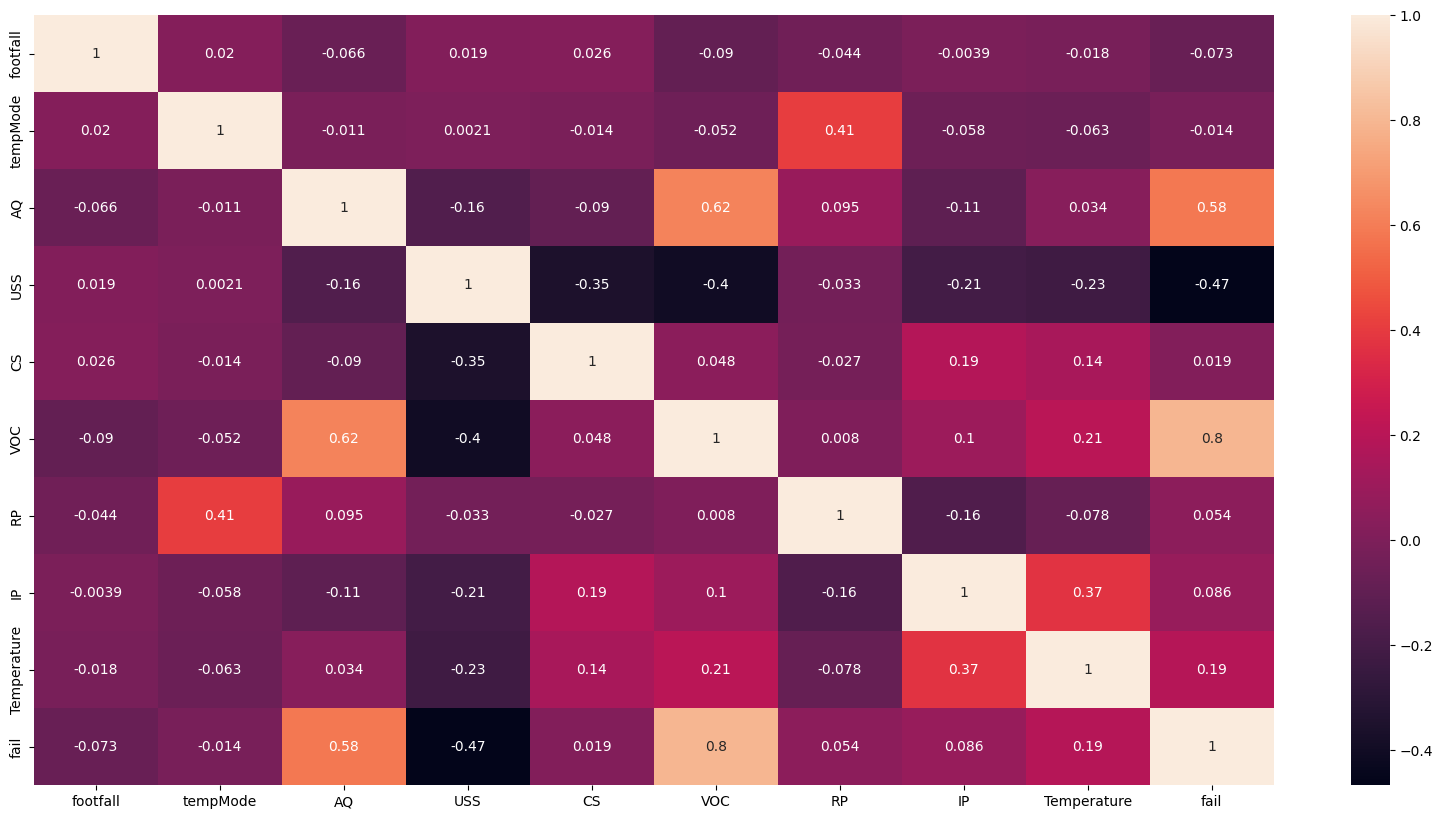

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Data Standardization

In [17]:
y = df["fail"]
X = df.drop(["fail"],axis=1)

In [18]:
X.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.28315338,  1.22289631,  1.86049689, ..., -0.67278806,
        -0.97950413, -2.56740712],
       [-0.10755803, -1.01941016, -0.92177489, ..., -1.64754019,
        -0.35389391, -2.56740712],
       [-0.25450362,  1.22289631, -1.61734284, ..., -1.40385216,
         0.89732651, -2.56740712],
       ...,
       [-0.28315338, -0.27197467,  1.16492894, ..., -0.24633401,
         0.89732651,  1.28414704],
       [-0.28315338,  0.84917856,  1.16492894, ..., -0.06356798,
         1.52293673,  1.28414704],
       [-0.26651803,  1.22289631, -0.22620695, ...,  0.85026213,
         1.52293673,  1.28414704]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((708, 9), (236, 9), (708,), (236,))

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       132
           1       0.78      0.81      0.79       104

    accuracy                           0.81       236
   macro avg       0.81      0.81      0.81       236
weighted avg       0.81      0.81      0.81       236



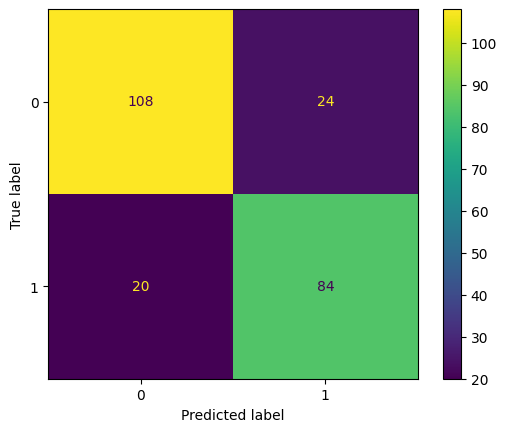

In [29]:
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [30]:
from sklearn import tree

<Figure size 5000x5000 with 0 Axes>

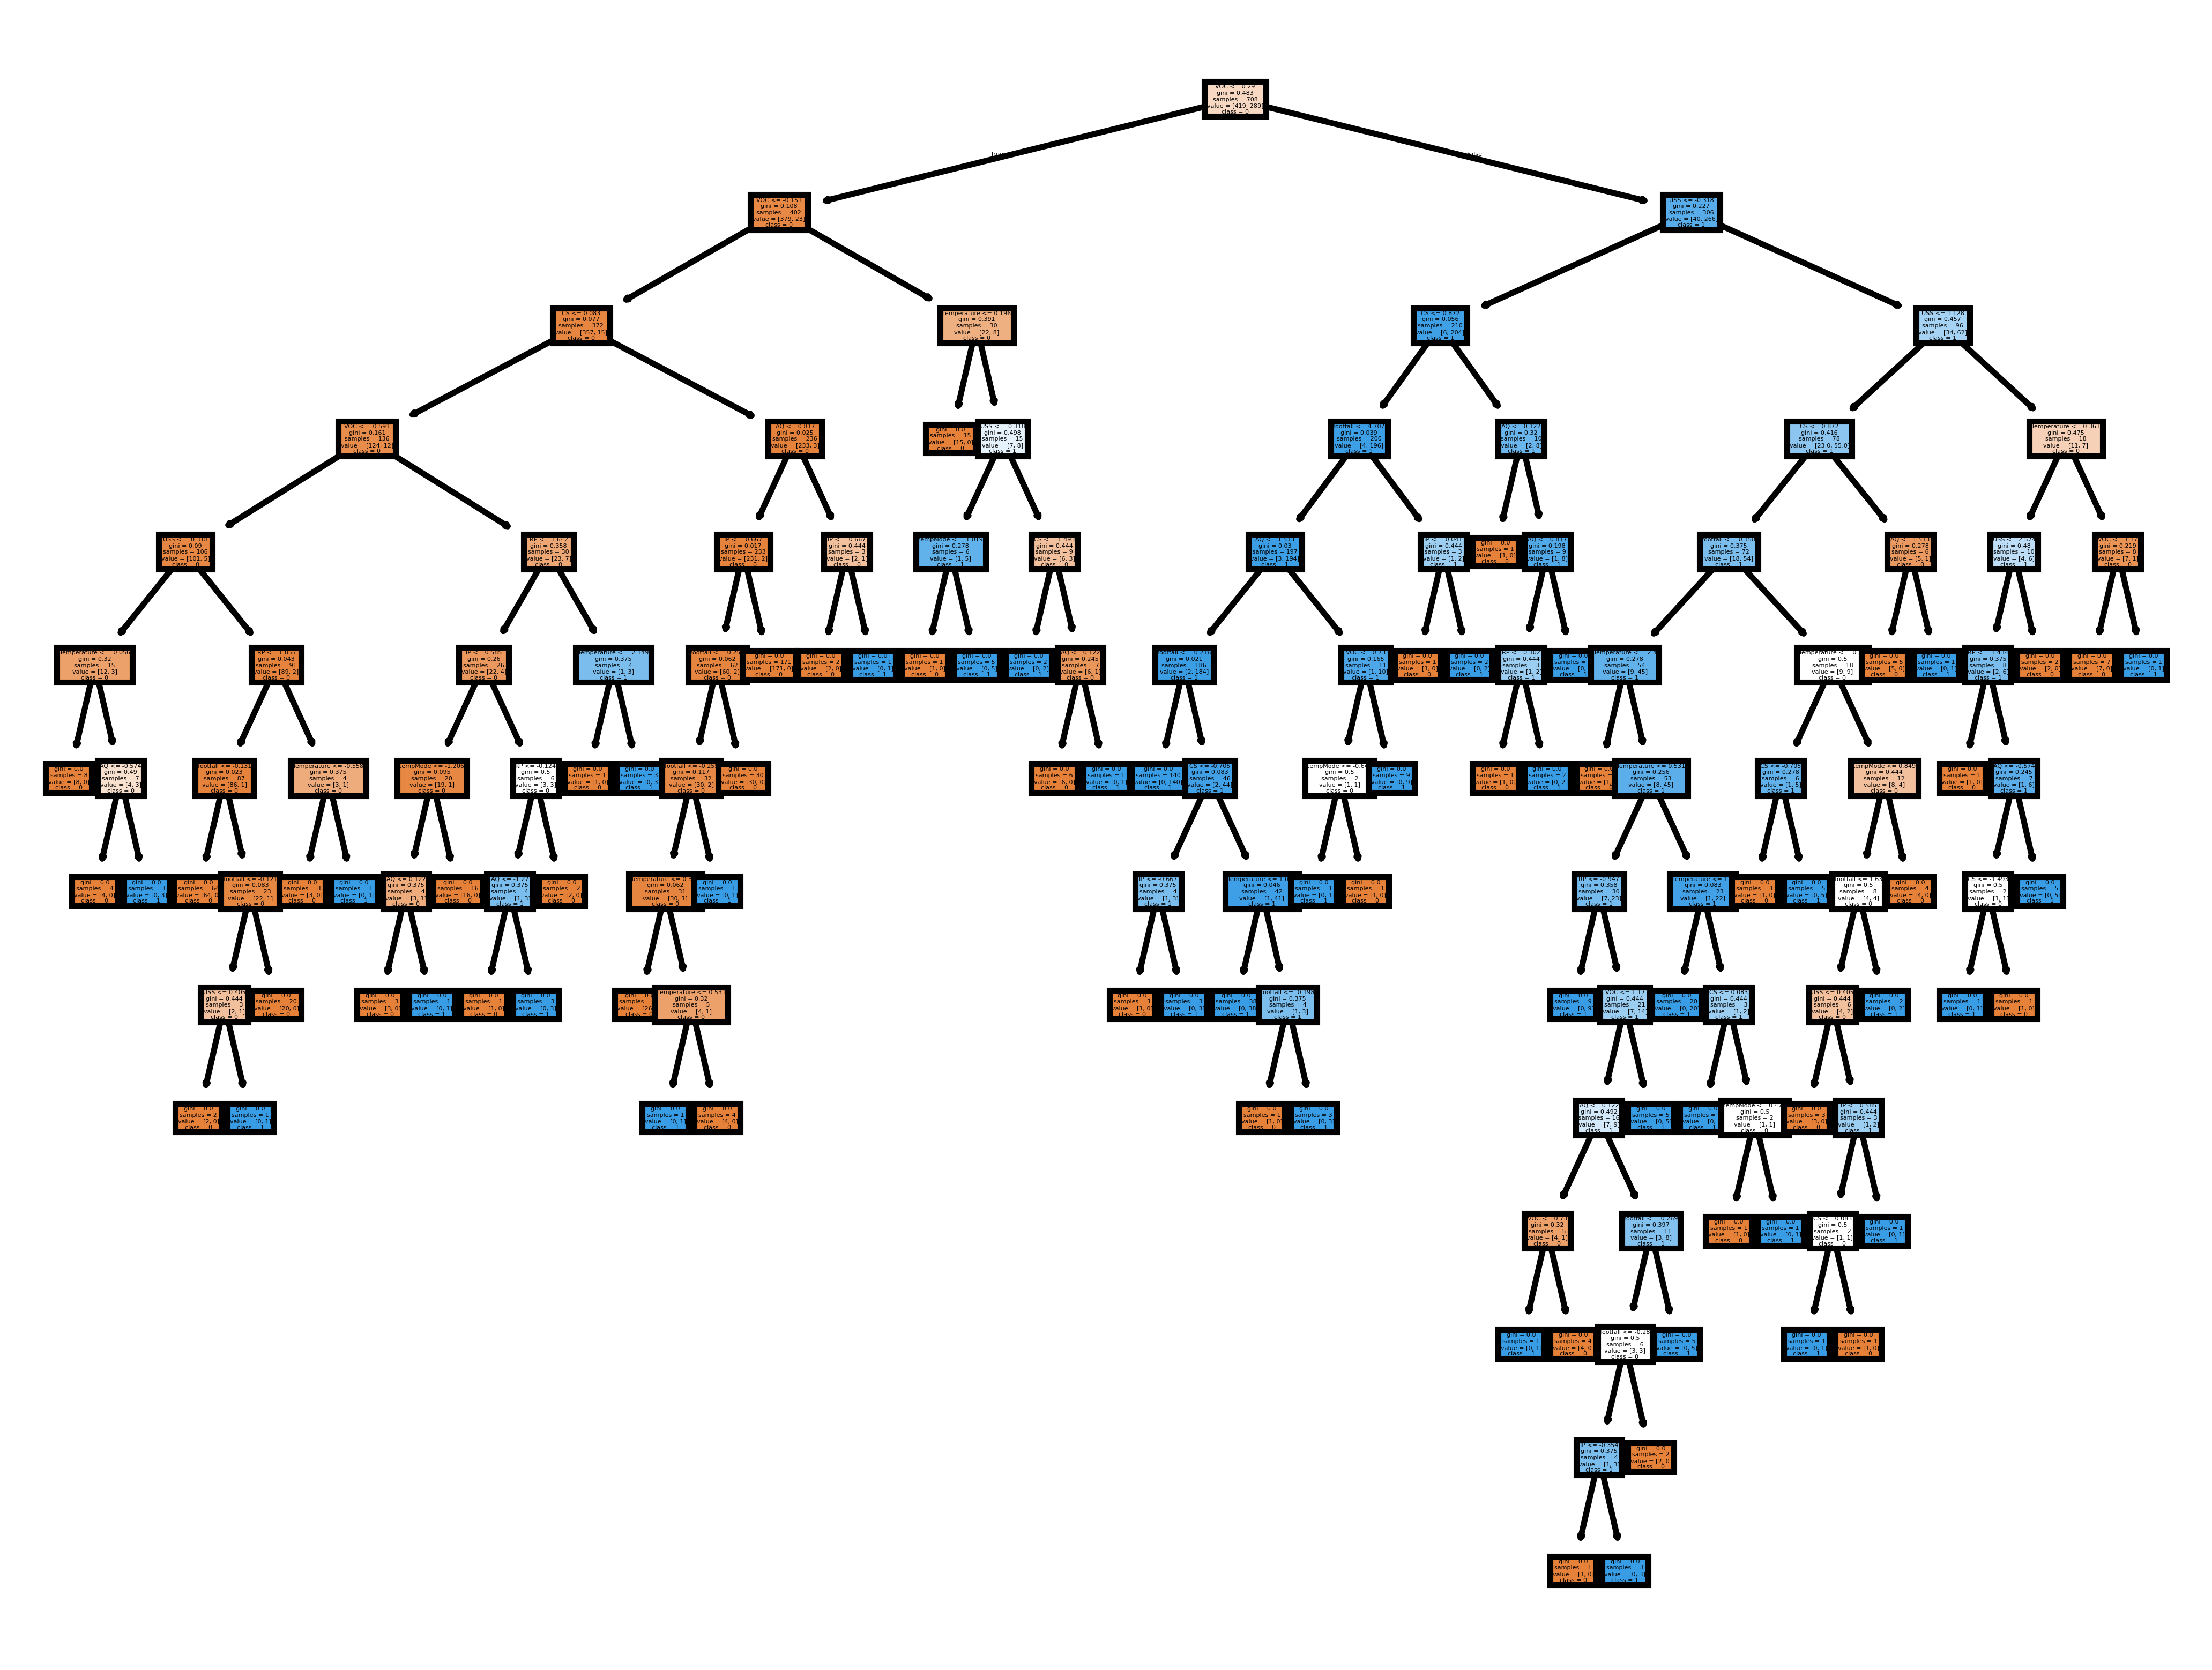

In [36]:
plt.figure(figsize=(50, 50))
plt.figure(dpi=800)
tree.plot_tree(
    model, 
    feature_names=X.columns,  # Use columns from X as feature names
    class_names=model.classes_.astype(str),  # Use unique y labels as class names
    filled=True
)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV 

In [40]:
params = {"criterion":['gini', 'entropy', 'log_loss'],"splitter":['best', 'random'],"max_depth":[1,2,3,None]}

In [41]:
model =DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       132
           1       0.84      0.91      0.88       104

    accuracy                           0.89       236
   macro avg       0.88      0.89      0.88       236
weighted avg       0.89      0.89      0.89       236



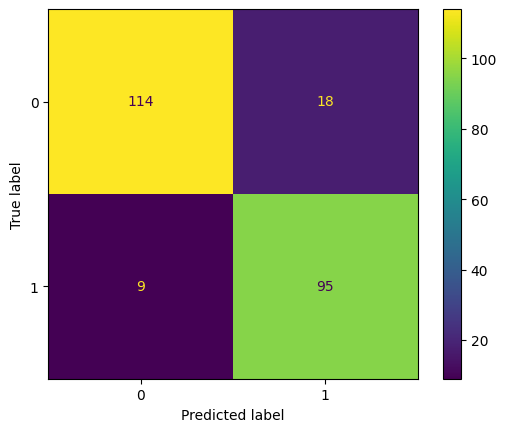

In [44]:
grid = GridSearchCV(model,params,cv=5)
grid.fit(X_train,y_train)

y_predict = grid.predict(X_test)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [45]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [46]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [56]:
best_model = grid.best_estimator_

<Figure size 2000x1000 with 0 Axes>

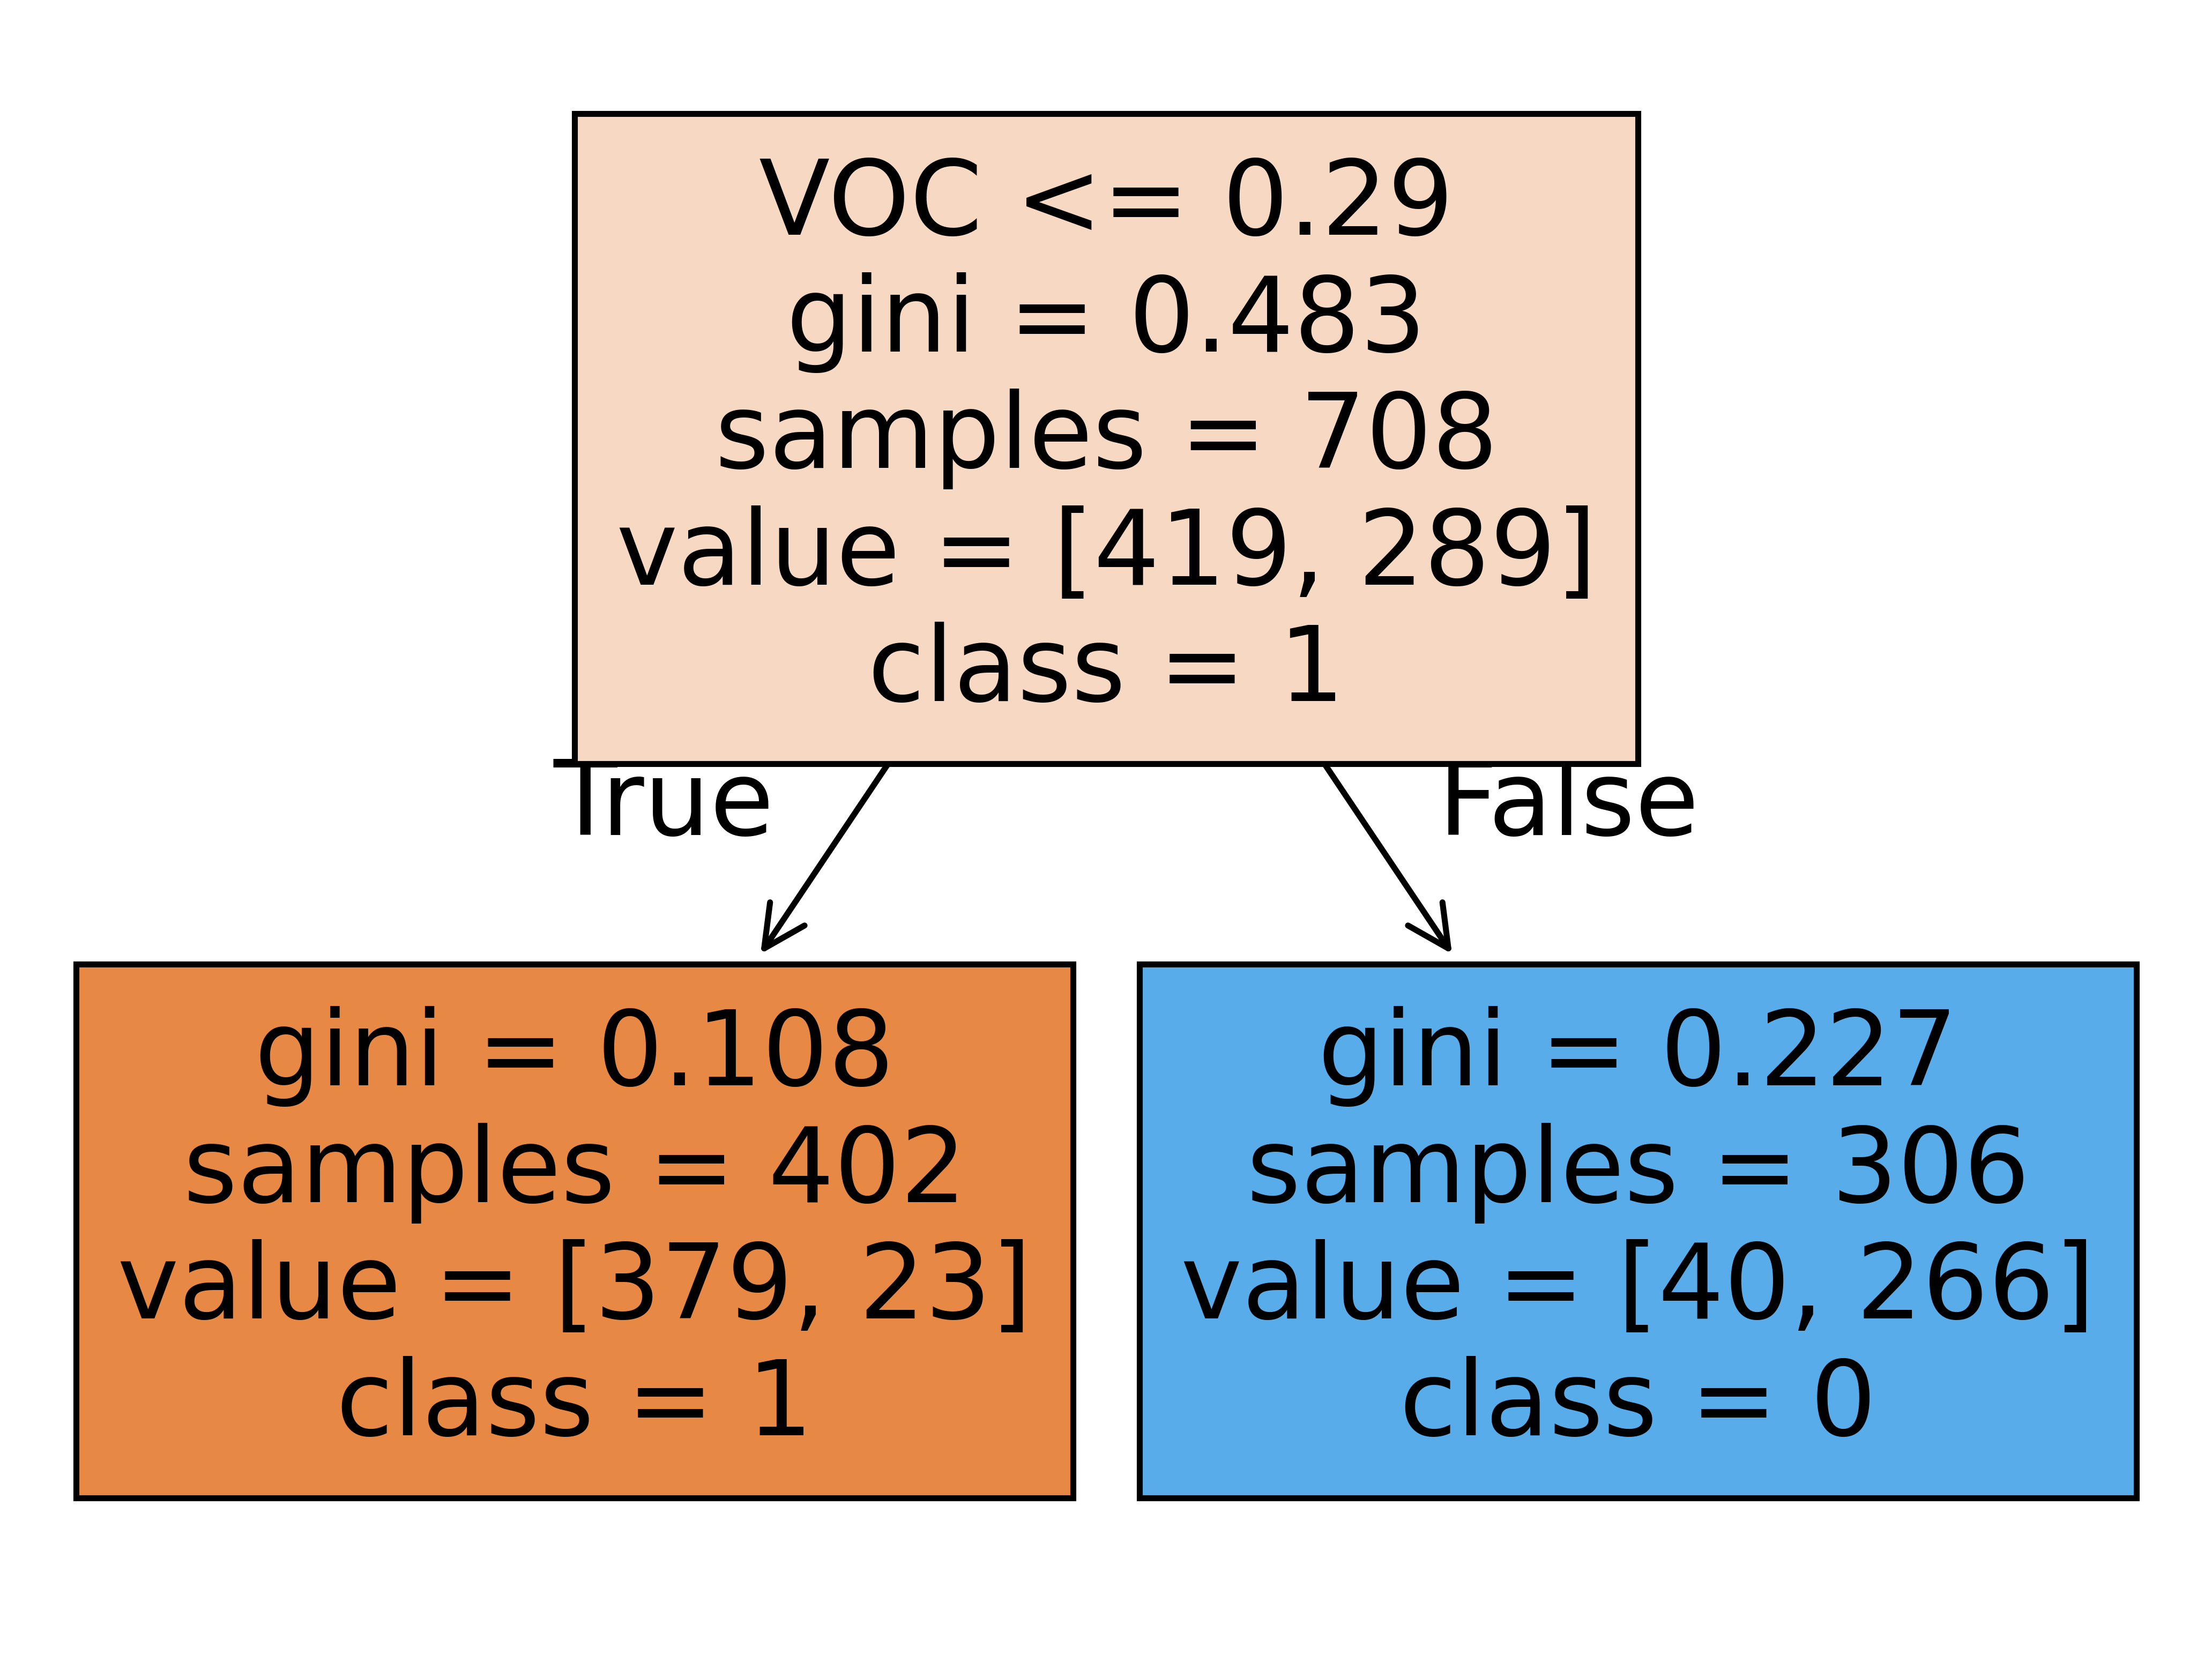

In [58]:
plt.figure(figsize=(20, 10))
plt.figure(dpi=800)
tree.plot_tree(
    best_model,
    feature_names=X.columns,  # Use columns from X as feature names
    class_names=y.unique().astype(str),   # Use unique y labels as class names
    filled=True
)
plt.show()